In [2]:
import pandas as pd
import matplotlib.pyplot as plt

        Date        Exercise  Sets  Reps  Weight  Volume  Week  Weekly Volume
0 2024-08-02   Incline Bench   3.0   8.0    55.0  1320.0    31         1320.0
1 2024-08-02  Shoulder Press   4.0   8.0    52.5  1680.0    31         1680.0
2 2024-08-03           Squat   4.0   8.0   205.0  6560.0    31         6560.0
3 2024-08-05   Incline Bench   4.0  10.0    57.5  2300.0    32         2300.0
4 2024-08-05         Pullups   3.0  10.0     1.0    30.0    32           30.0
5 2024-08-06  Shoulder Press   4.0   8.0    52.5  1680.0    32         1680.0
6 2024-08-10           Squat   4.0   8.0   195.0  6240.0    32         6240.0
7 2024-08-14  Shoulder Press   4.0   8.0    50.0  1600.0    33         1600.0


/tmp/ipykernel_120/2391333953.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  workout_data = pd.concat([workout_data, new_entry], ignore_index = True)


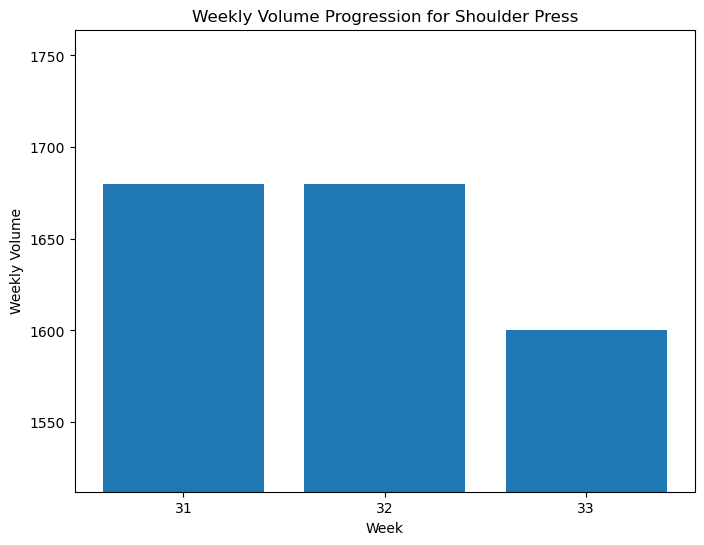

,Date,Exercise,Sets,Reps,Weight,Volume,Week,Weekly Volume,Volume Change,Overload
1,2024-08-02,Shoulder Press,4.0,8.0,52.5,1680.0,31,1680.0,NaN,False
5,2024-08-06,Shoulder Press,4.0,8.0,52.5,1680.0,32,1680.0,0.0,False
7,2024-08-14,Shoulder Press,4.0,8.0,50.0,1600.0,33,1600.0,-80.0,False


In [31]:
#Define Data Structure
Lifts = ["Squat", "Shoulder Press", "Pullups", "Incline Bench"]
col_name = ["Date", "Exercise", "Sets", "Reps", "Weight", "Volume", "Week", "Weekly Volume"]
workout_data = pd.DataFrame(columns = col_name)
workout_data.head

#Function to input data
def input_workout(date, exercise, sets, reps, weight):
    global workout_data
    #Apply units for variables
    new_entry = pd.DataFrame([[date, exercise, sets, reps, weight, 0, 0, 0]], columns = col_name)
    new_entry["Date"] = pd.to_datetime(new_entry["Date"], errors='coerce')
    new_entry["Sets"] = new_entry["Sets"].astype(float)
    new_entry["Reps"] = new_entry["Reps"].astype(float)
    new_entry["Weight"] = new_entry["Weight"].astype(float)
    new_entry["Week"] = new_entry["Date"].dt.isocalendar().week
    
    #Calculate Volume
    new_entry["Volume"] = new_entry["Sets"] * new_entry["Reps"] * new_entry["Weight"]
    
    #Append new entries
    workout_data = pd.concat([workout_data, new_entry], ignore_index = True)

    # Drop original 'Weekly Volume' column before merging to avoid duplicates
    workout_data.drop(columns=['Weekly Volume'], inplace=True)
    
    #Calculate weekly volume
    weekly_volumes = workout_data.groupby(["Week", "Exercise"])["Volume"].sum().reset_index()
    weekly_volumes.rename(columns = {"Volume": "Weekly Volume"}, inplace= True)

    workout_data = pd.merge(workout_data, weekly_volumes, on=['Week', 'Exercise'], how='left')
    workout_data.sort_values(by = "Date", inplace = True)
    workout_data.reset_index(drop = True, inplace = True)

def plot_weekly_vol(exercise):
    #Filter exercise
    exercise_data = workout_data[workout_data["Exercise"] == exercise].copy()

    # Ensure 'Week' is of type int64 
    exercise_data['Week'] = exercise_data['Week'].astype('int64')
    
    #Bar Plot
    plt.figure(figsize = (8,6))
    plt.bar(exercise_data["Week"], exercise_data["Weekly Volume"])
    plt.xlabel("Week")
    plt.ylabel("Weekly Volume")
    plt.title(f"Weekly Volume Progression for {exercise}")
    plt.xticks(exercise_data['Week'].unique())  # Display each week on the x-axis
   
    #Adjust y-axis
    y_max = exercise_data["Weekly Volume"].max() * 1.05
    y_min = exercise_data["Weekly Volume"].max() * 0.90
    plt.ylim(y_min, y_max)
    
    plt.show()

#Check if progressive overload occurs from week to week (increase in volume)
def progressive_overload(exercise):
    exercise_data = workout_data[workout_data["Exercise"] == exercise].copy()
    exercise_data.sort_values(by='Week', inplace=True)
    exercise_data["Volume Change"] = exercise_data["Weekly Volume"].diff()
    exercise_data["Overload"] = exercise_data["Volume Change"] > 0
    return exercise_data

    


    
# Input Data
input_workout("2024-08-06", "Shoulder Press", "4", "8", "52.5")
input_workout("2024-08-05", "Incline Bench", "4", "10", "57.5")
input_workout("2024-08-05", "Pullups", "3", "10", "1")
input_workout("2024-08-03", "Squat", "4", "8", "205")
input_workout("2024-08-02", "Incline Bench", "3", "8", "55")
input_workout("2024-08-02", "Shoulder Press", "4", "8", "52.5")
input_workout("2024-08-10", "Squat", "4", "8", "195")
input_workout("2024-08-14", "Shoulder Press", "4", "8", "50")
input_workout("2024-08-20", "Pullups", "3", "9", "1")

print(workout_data)
plot_weekly_vol("Shoulder Press")
progressive_overload('Shoulder Press')
